# User flow - Conversions by pages


### 0. Import libraries

In [244]:
%matplotlib inline 

import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns #sets up styles and gives us more plotting options


### 1. Settings

In [245]:
# Time period 1st Jan - 30th April (arbitrary )

# API credentials
# Email address 705762800217-compute@developer.gserviceaccount.com
# Key IDs 948ee8e2a420ef14a5d5a29bd35104fe2f1e6ed4
 

In [246]:
# open file. It is requested via API explorer using request parameters:

#Account: TMRW Tech Hub
#Property: TMRW
#View: All Web Site Data
#ids: ga:123303369
#start-date: 2017-02-01
#end-date: 2017-04-30

#metrics
#ga:sessions
#ga:sessionsWithEvent

#dimensions
#ga:pagePath

#sort
#-ga:sessionsWithEvent

#filter
#ga:sessions>10

### 2. Data import & transformation

In [274]:
# Open file
# original file exported from GA includes ga:pagePath,ga:sessions,ga:sessionsWithEvent
# Calculate "cr" as "Sessions with event"/"Sessions" for each page.

input_flow= pd.read_csv('files/TMRW_events.csv')

# rename columns
input_flow.columns=['Page','Sessions','Conversions','CR']

# filter page with CR > 0
input_flow = input_flow[input_flow.CR > 0]

# group by page
input_flow_index = input_flow.set_index('Page')
input_flow

,Page,Sessions,Conversions,CR
0,'/,4436,82,0.018485
1,'/TMRW_FAQs.php,100,26,0.260000
2,'/TMRW_Byte_Cafe.php,218,23,0.105505
3,'/TMRW_the_team.php,99,10,0.101010


### 3. Calculate

In [275]:
homepage_CR = "%.2f"%(input_flow_index.loc['\'/','CR']*100)
homepage_CR

'1.85'

In [276]:
input_flow_cr = input_flow.set_index('CR')

max_cr = max(input_flow.loc[:,'CR'])
best_page = input_flow_cr.loc[max_cr,'Page']

best_page

"'/TMRW_FAQs.php"

### 4. Validate

### 5. Visualise

In [282]:
from bokeh.charts import Bar, show

p = Bar(input_flow, 'Page', values='CR', title="The best converting page on your site is %s" % best_page)
#p.legend.location = "top_right"

show(p)
print("Conversion rate for homepage is %s" % homepage_CR + "%")
print("Put an additional button \"Contact Us\" on the main page. (or adding the contact form link to the menu bar at the top of the homepage")

FileNotFoundError: [Errno 2] No such file or directory: ''

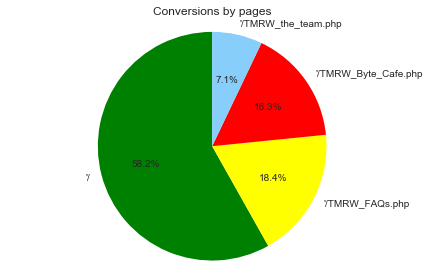

In [269]:
output_chart_flow = input_flow_index.loc[:,"Conversions"]

labels = output_chart_flow.index
sizes = input_flow['Conversions']
colors = ['green','yellow', 'red', 'lightskyblue']
explode = (0, 0, 0,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=False, startangle=90)
#plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.title('Conversions by pages')
plt.tight_layout()
plt.show()
